In [37]:
# 5.1.


from typing import Callable, List, Union


def newton(
        fun: Callable[[float], float],
        der: Union[Callable[[float], float], float],
        x0: float,
        iter_num: int
) -> List[float]:
    if not callable(der):
        h = der
        
        def der(x):
            return (fun(x + h) - fun(x)) / h
        
    x_prev = x0
    x_next = x_prev - fun(x_prev) / der(x_prev)
    y = [x_prev, x_next]
    x_prev = x_next
    for i in range(iter_num - 1):
        x_next = x_prev - fun(x_prev) / der(x_prev)
        y.append(x_next)
        x_prev = x_next
    
    return y

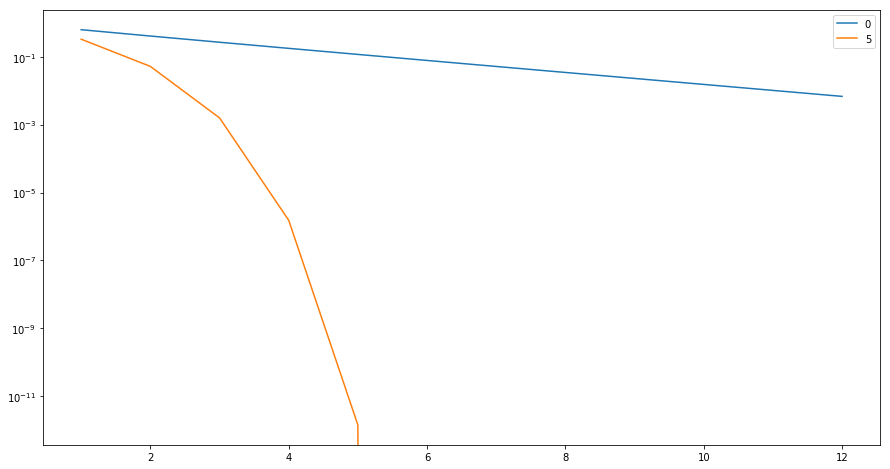

In [38]:
# 5.2.


%matplotlib inline


from matplotlib.pyplot import figure, plot, show, legend, yscale, title


def f1(x: float) -> float:
    return x ** 3 * (x - 5)


def d1(x: float) -> float:
    return x ** 2 * (4 * x - 15)


figure(figsize=(15, 8))
yscale("log")
x_axis = range(1, 13)
y_axis = []
for elem_x in x_axis:
    y_axis.append(newton(f1, d1, 1, elem_x)[-1])
plot(x_axis, y_axis)
y_axis = []
for elem_x in x_axis:
    y_axis.append(newton(f1, d1, 6, elem_x)[-1] - 5)
plot(x_axis, y_axis)
legend(["0", "5"])
show()

In [39]:
# 5.3.


print(newton(f1, 3, 50, 12))

[50, 38.90602565518547, 30.577061533187813, 24.320222946809896, 19.615875106768836, 16.074489400746284, 13.404307463564377, 11.387069322650374, 9.859740600841096, 8.700702853339877, 7.819286125189399, 7.147838245010944, 6.635748852039935]


In [40]:
# 5.4.


def f2(x: float) -> float:
    return 1 / x - 3


def d2(x: float) -> float:
    return -1 / x ** 2


x0s = [-3, 0.01, 0.62, 1]


for x0 in x0s:
    print(newton(f2, d2, x0, 8))

[-3, -33.0, -3333.0, -33333333.0, -3333333333333333.5, -3.3333333333333347e+31, -3.333333333333336e+63, -3.333333333333339e+127, -3.333333333333344e+255]
[0.01, 0.019700000000000002, 0.03823573000000001, 0.07208554685410132, 0.12858211551243814, 0.20756414973591433, 0.2858796707050495, 0.32657778304281637, 0.3331964209541502]
[0.62, 0.08679999999999999, 0.15099727999999998, 0.2335940242978048, 0.30348954403267936, 0.33066137805386786, 0.33331191529828696, 0.33333333195713666, 0.3333333333333333]
[1, -1.0, -5.0, -85.0, -21844.999999999996, -1431655764.9999995, -6.148914691236513e+18, -1.1342745564031266e+38, -3.8597363079105293e+76]


In [41]:
# 5.5.


from numpy import sign


def bisection(
        fun: Callable[[float], float],
        a: float,
        b: float,
        iter_num: int
) -> List[float]:
    x = [(a + b) / 2]
    for i in range(iter_num):
        if sign(fun(x[-1])) != sign(fun(a)):
            b = x[-1]
        else:
            a = x[-1]
        x.append((a + b) / 2)
    
    return x

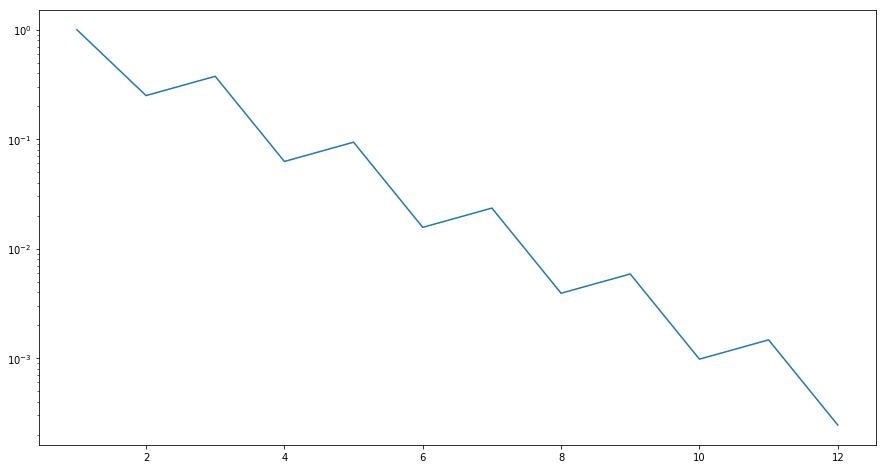

In [42]:
# 5.6.


from numpy import e


def f3(x: float) -> float:
    return (x - 1.5) * e ** x


figure(figsize=(15, 8))
yscale("log")
x_axis = range(1, 13)
y_axis = []
for elem_x in x_axis:
    y_axis.append(abs(1.5 - bisection(f3, -5, 5, elem_x)[-1]))
plot(x_axis, y_axis)
show()

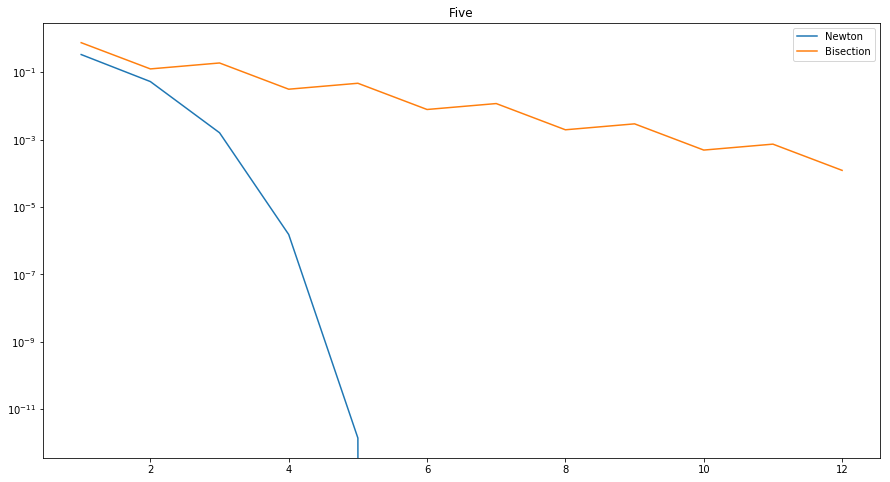

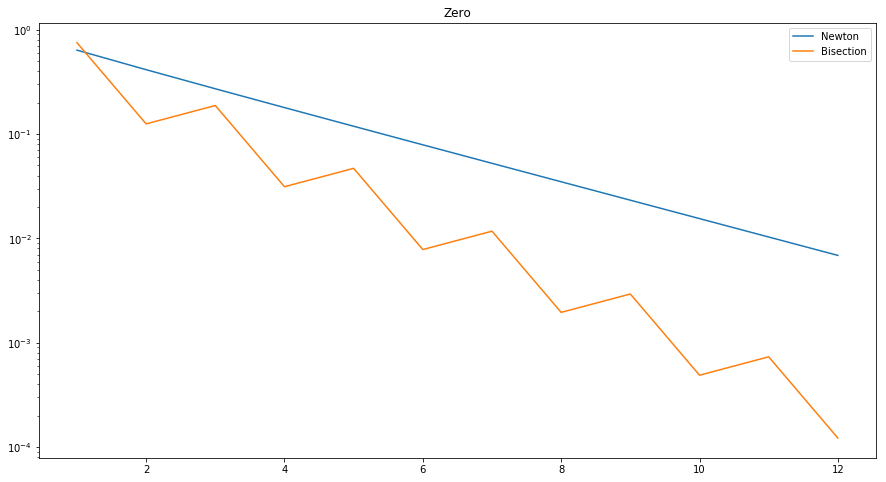

In [43]:
# 5.7.


figure(figsize=(15, 8))
yscale("log")
x_axis = range(1, 13)
y_axis = []
for elem_x in x_axis:
    y_axis.append(newton(f1, d1, 6, elem_x)[-1] - 5)
plot(x_axis, y_axis)
y_axis = []
for elem_x in x_axis:
    y_axis.append(abs(bisection(f1, 2, 7, elem_x)[-1] - 5))
plot(x_axis, y_axis)
title("Five")
legend(["Newton", "Bisection"])
show()

figure(figsize=(15, 8))
yscale("log")
x_axis = range(1, 13)
y_axis = []
for elem_x in x_axis:
    y_axis.append(newton(f1, d1, 1, elem_x)[-1])
plot(x_axis, y_axis)
y_axis = []
for elem_x in x_axis:
    y_axis.append(abs(bisection(f1, -2, 3, elem_x)[-1]))
plot(x_axis, y_axis)
title("Zero")
legend(["Newton", "Bisection"])
show()

In [57]:
# 5.8.


def secant(
        fun: Callable[[float], float],
        x0: float,
        x1: float,
        iter_num: int
) -> List[float]:
    y = [x0, x1]
    for i in range(iter_num - 1):
        x = x1 - fun(x1) * (x1 - x0) / (fun(x1) - fun(x0))
        y.append(x)
        x0 = x1
        x1 = x
    
    return y

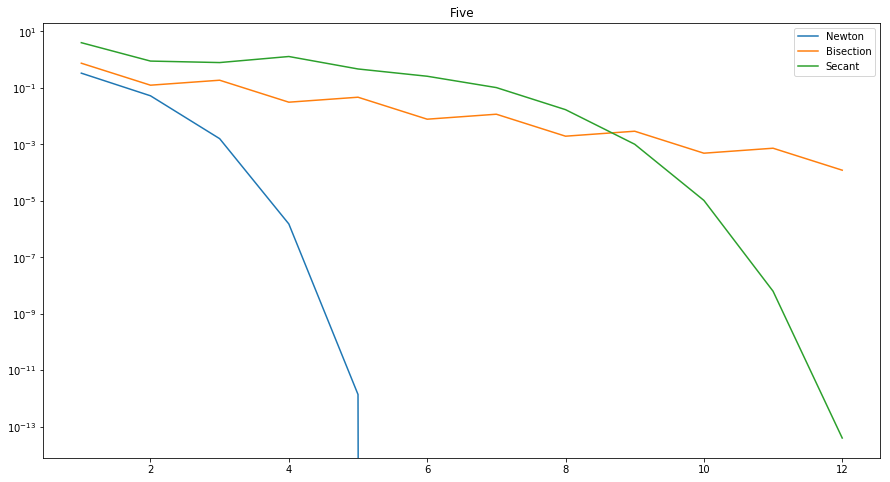

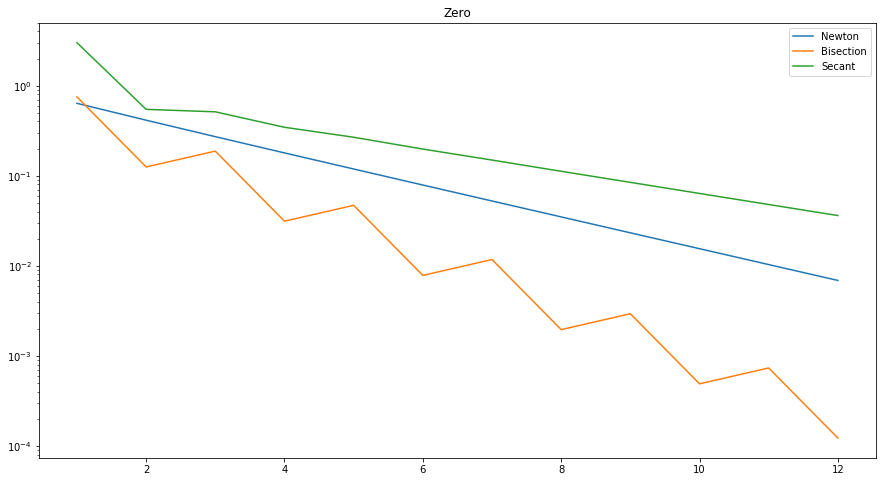

In [64]:
# 5.9.


figure(figsize=(15, 8))
yscale("log")
x_axis = range(1, 13)
y_axis = []
for elem_x in x_axis:
    y_axis.append(newton(f1, d1, 6, elem_x)[-1] - 5)
plot(x_axis, y_axis)
y_axis = []
for elem_x in x_axis:
    y_axis.append(abs(bisection(f1, 2, 7, elem_x)[-1] - 5))
plot(x_axis, y_axis)
y_axis = []
for elem_x in x_axis:
    y_axis.append(abs(secant(f1, 4, 9, elem_x)[-1] - 5))
plot(x_axis, y_axis)
title("Five")
legend(["Newton", "Bisection", "Secant"])
show()

figure(figsize=(15, 8))
yscale("log")
x_axis = range(1, 13)
y_axis = []
for elem_x in x_axis:
    y_axis.append(newton(f1, d1, 1, elem_x)[-1])
plot(x_axis, y_axis)
y_axis = []
for elem_x in x_axis:
    y_axis.append(abs(bisection(f1, -2, 3, elem_x)[-1]))
plot(x_axis, y_axis)
y_axis = []
for elem_x in x_axis:
    y_axis.append(abs(secant(f1, -2, 3, elem_x)[-1]))
plot(x_axis, y_axis)
title("Zero")
legend(["Newton", "Bisection", "Secant"])
show()